# 01 – Synthetic data generation and sanity checks

This notebook documents the synthetic customer dataset used in the case study
and performs basic sanity checks on its structure and distributions.

The actual generation of the synthetic CSVs is implemented in
`generate_synthetic_customers.py`. Here we:

- load the public synthetic files,
- inspect their columns and ranges,
- check regional counts and basic distributions,
- visualise the spatial layout of the four regions,
- verify that the Northern subset is consistent with the full system.

The goal is to show that the anonymised data is coherent and suitable for the
subsequent analysis notebooks.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

# Display options (just for nicer tables)
pd.set_option("display.max_columns", 30)
pd.set_option("display.width", 140)

# Paths (assuming the notebook lives in notebooks/)
ROOT_DIR = Path("..")
DATA_DIR = ROOT_DIR / "data"

PATH_FULL = DATA_DIR / "customers_synthetic_160k.csv"
PATH_NORTH = DATA_DIR / "customers_synthetic_north.csv"

PATH_FULL, PATH_NORTH


(WindowsPath('../data/customers_synthetic_160k.csv'),
 WindowsPath('../data/customers_synthetic_north.csv'))

In [3]:
df_full = pd.read_csv(PATH_FULL)
df_north = pd.read_csv(PATH_NORTH)

df_full.shape, df_north.shape


((160000, 21), (63720, 21))

In [5]:
pd.DataFrame({
    "column": df_full.columns,
    "dtype": df_full.dtypes.values
})


,column,dtype
0,DSREG,object
1,CDCLIE,float64
2,NROPUESUM,int64
3,VVENTASPROM,float64
4,LATTUD,float64
5,LNGTUD,float64
6,HUB,object
7,PESO POR SERVICIOS,int64
8,CANTIDADEQ,int64
9,EDADDIAS,float64


In [6]:
df_full = df_full.copy()
df_north = df_north.copy()

# Ensure a canonical total-service column name
if "Cantidad_total_serv" in df_full.columns:
    total_col = "Cantidad_total_serv"
elif "Cantidad total serv" in df_full.columns:
    total_col = "Cantidad total serv"
else:
    raise KeyError("No total service column found in df_full.")

df_full["Cantidad_total_serv"] = df_full[total_col]

if "Cantidad_total_serv" in df_north.columns:
    df_north["Cantidad_total_serv"] = df_north["Cantidad_total_serv"]
elif "Cantidad total serv" in df_north.columns:
    df_north["Cantidad_total_serv"] = df_north["Cantidad total serv"]
else:
    raise KeyError("No total service column found in df_north.")

df_full[["Cantidad_total_serv"]].head()


,Cantidad_total_serv
0,0
1,1
2,3
3,1
4,2


In [7]:
df_full.head()


,DSREG,CDCLIE,NROPUESUM,VVENTASPROM,LATTUD,LNGTUD,HUB,PESO POR SERVICIOS,CANTIDADEQ,EDADDIAS,Cantserviciosdistri,CantserviciosST,Cantidad total serv,TIEMPO DE EJECUCION PROMEDIO (MINUTOS),TIEMPO PROMEDIO DE LLAMADOS (DIAS),DEPARTAMENTO,DEPARTAMENTO OPTIMO,ZONA OPTIMA,Distancia_punto1_m,Distancia_punto2_m,Cantidad_total_serv
0,NORTE,6.156346e+06,2,23.817759,-8.150649,-79.841065,TRUJILLO,0,1,2522.513428,0,0,1,0.000000,0.379474,LA LIBERTAD,0.975740,NaN,13571,240357,0
1,NORTE,6.050903e+06,1,47.631922,-9.152026,-78.772544,TRUJILLO,1,1,3169.428633,1,0,1,0.000000,0.857509,ANCASH,0.976667,NaN,14264,0,1
2,CENTRO,1.005287e+06,1,32.985311,-9.999186,-82.221081,PIURA,2,1,5321.125055,3,0,1,3783.507640,1.246051,PIURA,0.960063,NaN,549343,16768,3
3,NORTE,1.866376e+06,2,21.764656,-9.470377,-78.523142,TRUJILLO,0,1,799.794277,1,0,1,1569.841855,0.301505,ANCASH,0.003087,NaN,2964,283391,1
4,NORTE,1.680596e+06,1,37.902756,-9.159700,-80.276835,TRUJILLO,1,1,1299.107842,2,0,1,124.375773,0.000000,CAJAMARCA,0.007660,NaN,113977,444422,2


In [8]:
region_counts = df_full["DSREG"].value_counts().sort_index()
region_props = df_full["DSREG"].value_counts(normalize=True).sort_index()

pd.DataFrame({
    "count": region_counts,
    "proportion": region_props
})


,count,proportion
DSREG,,
CENTRO,32160,0.201000
LIMA,32225,0.201406
NORTE,63720,0.398250
SUR,31895,0.199344


In [10]:
df_full.groupby("DSREG")[cols_numeric].agg(["mean", "std", "min", "max"])


NROPUESUM                   VVENTASPROM                             CANTIDADEQ                       EDADDIAS                    \
            mean       std min max        mean        std  min         max       mean       std min max         mean          std  min   
DSREG                                                                                                                                    
CENTRO  1.320305  0.931591   0   5   59.651375  71.971358  0.0  505.540608   1.295180  0.611031   1   4  1936.680751  1547.283083  0.0   
LIMA    1.312894  0.923261   0   5   60.079059  72.297089  0.0  504.765978   1.294895  0.613451   1   4  1958.559882  1554.925578  0.0   
NORTE   1.322881  0.937165   0   5   59.900891  72.212041  0.0  507.333952   1.292969  0.607874   1   4  1936.841103  1547.177238  0.0   
SUR     1.327826  0.931703   0   5   59.136214  71.353589  0.0  504.705902   1.293494  0.608349   1   4  1934.738838  1544.277190  0.0   

                    Cantserviciosdistri                   CantserviciosST                   Cantidad_total_serv                    
                max                mean       std min max            mean       std min max                mean       std min max  
DSREG                                                                                                                              
CENTRO  5506.755573            0.906219  1.103708   0   5        0.215361  0.577316   0   3            1.121580  1.247687   0   8  
LIMA    5529.838701            0.906718  1.100657   0   5        0.216416  0.574045   0   3            1.123134  1.234504   0   8  
NORTE   5520.680133            0.899498  1.098375   0   5        0.219036  0.577408   0   3            1.118534  1.244002   0   8  
SUR     5509.000134            0.897852  1.096881   0   5        0.216209  0.573473   0   3            1.114062  1.234080   0   8

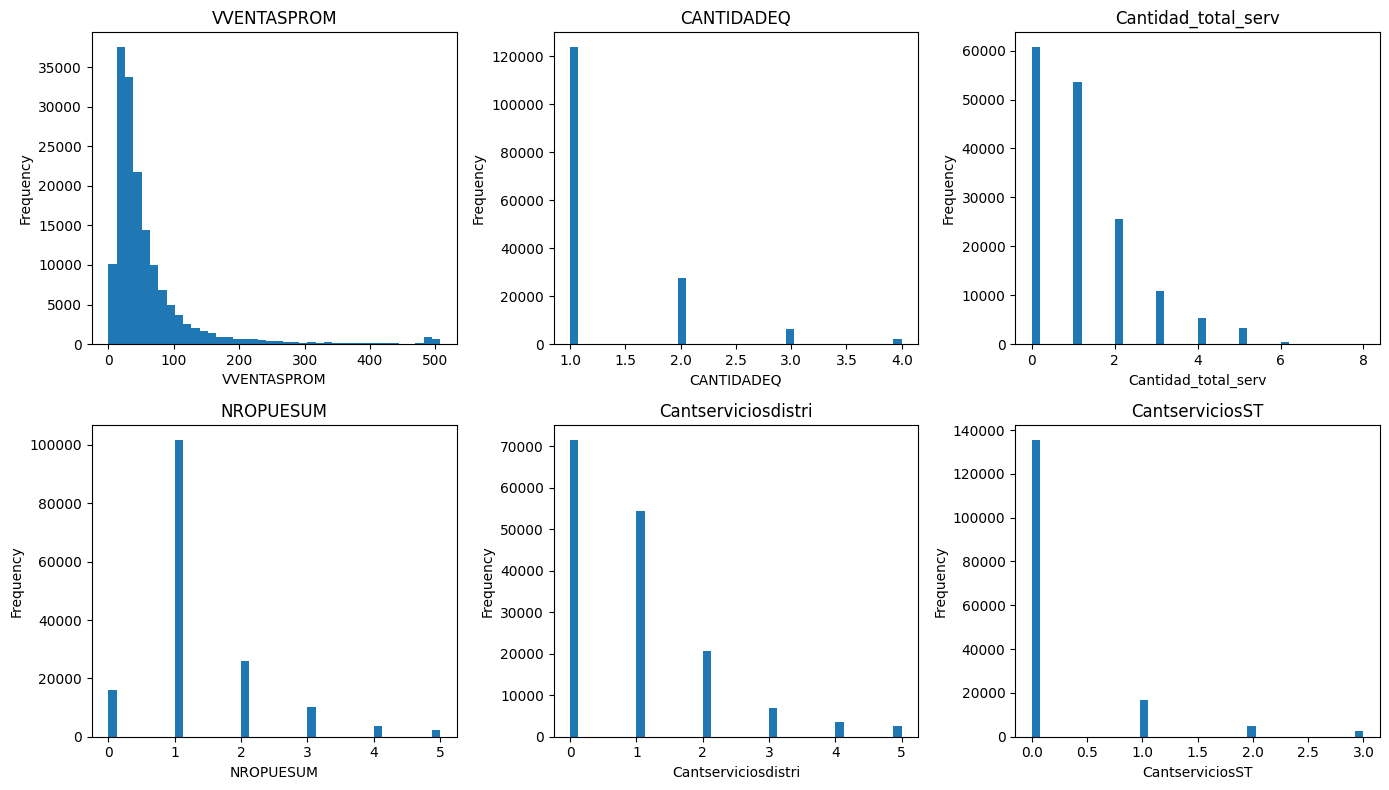

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.ravel()

plot_cols = ["VVENTASPROM", "CANTIDADEQ", "Cantidad_total_serv",
             "NROPUESUM", "Cantserviciosdistri", "CantserviciosST"]

for ax, col in zip(axes, plot_cols):
    ax.hist(df_full[col], bins=40)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

fig.tight_layout()
plt.show()


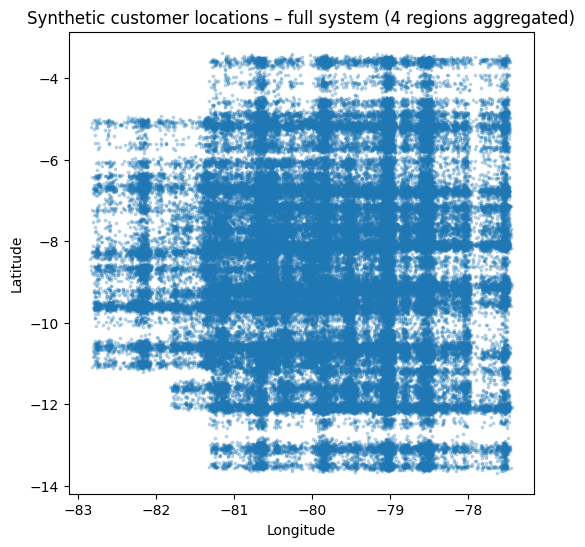

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(
    df_full["LNGTUD"],
    df_full["LATTUD"],
    s=3,
    alpha=0.25,
)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Synthetic customer locations – full system (4 regions aggregated)")
plt.show()


In [13]:
df_north["DSREG"].value_counts()


DSREG
NORTE    63720
Name: count, dtype: int64

In [14]:
df_north[cols_numeric].describe()


,NROPUESUM,VVENTASPROM,CANTIDADEQ,EDADDIAS,Cantserviciosdistri,CantserviciosST,Cantidad_total_serv
count,63720.000000,63720.000000,63720.000000,63720.000000,63720.000000,63720.000000,63720.000000
mean,1.322881,59.900891,1.292969,1936.841103,0.899498,0.219036,1.118534
std,0.937165,72.212041,0.607874,1547.177238,1.098375,0.577408,1.244002
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.061423,1.000000,461.660731,0.000000,0.000000,0.000000
50%,1.000000,37.556458,1.000000,1646.646447,1.000000,0.000000,1.000000
75%,2.000000,66.187301,1.000000,3072.370331,1.000000,0.000000,2.000000
max,5.000000,507.333952,4.000000,5520.680133,5.000000,3.000000,8.000000


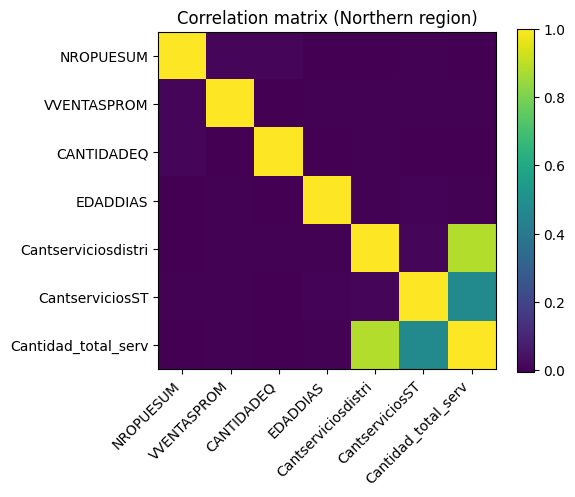

In [15]:
corr = df_north[cols_numeric].corr()

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(corr, cmap="viridis")

ax.set_xticks(range(len(cols_numeric)))
ax.set_yticks(range(len(cols_numeric)))
ax.set_xticklabels(cols_numeric, rotation=45, ha="right")
ax.set_yticklabels(cols_numeric)

fig.colorbar(im, ax=ax)
ax.set_title("Correlation matrix (Northern region)")
plt.tight_layout()
plt.show()


## Summary

- The synthetic dataset contains ~160k customers across four regions,
  with proportions close to the intended split (40% North, 20% each for
  the remaining regions).
- Key operational variables (sales, equipment, services) show coherent
  ranges and distributions across the system.
- The Northern subset has a consistent structure with the full dataset
  and will be used as the basis for the importance weighting (Notebook 02)
  and the two-hub optimisation and policy simulations (Notebooks 03 and 04).
